In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bankruptcy = pd.read_csv('https://raw.githubusercontent.com/christianolivamoya/MIAX11-ML/main/data/bankruptcy.csv', index_col='Company')
bankruptcy.head()

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,Bankrupt
Company,,,,,,
360Networks,9.3,-7.7,1.6,9.1,3.726,yes
Advanced Radio Telecom,42.6,-60.1,-10.1,0.3,4.130,yes
Ardent Communications,-28.8,-203.2,-51.0,14.7,0.111,yes
At Home Corp.,2.5,-433.1,-6.0,29.3,1.949,yes
Convergent Communications,26.1,-57.4,-23.5,54.2,0.855,yes


In [3]:
features = bankruptcy.drop(columns='Bankrupt')
target = bankruptcy['Bankrupt']

In [4]:
def normalizar(x):
  return (x - x.mean()) / x.std()

In [5]:
features_scaled = features.apply(normalizar)
features_scaled.head()

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL
Company,,,,,
360Networks,0.130789,0.502211,0.346543,-0.994526,0.133042
Advanced Radio Telecom,1.102512,-0.079535,-0.093118,-1.279658,0.207512
Ardent Communications,-0.981003,-1.668234,-1.630050,-0.813079,-0.533312
At Home Corp.,-0.067641,-4.220589,0.060951,-0.340019,-0.194513
Convergent Communications,0.621028,-0.049559,-0.596660,0.466773,-0.396170


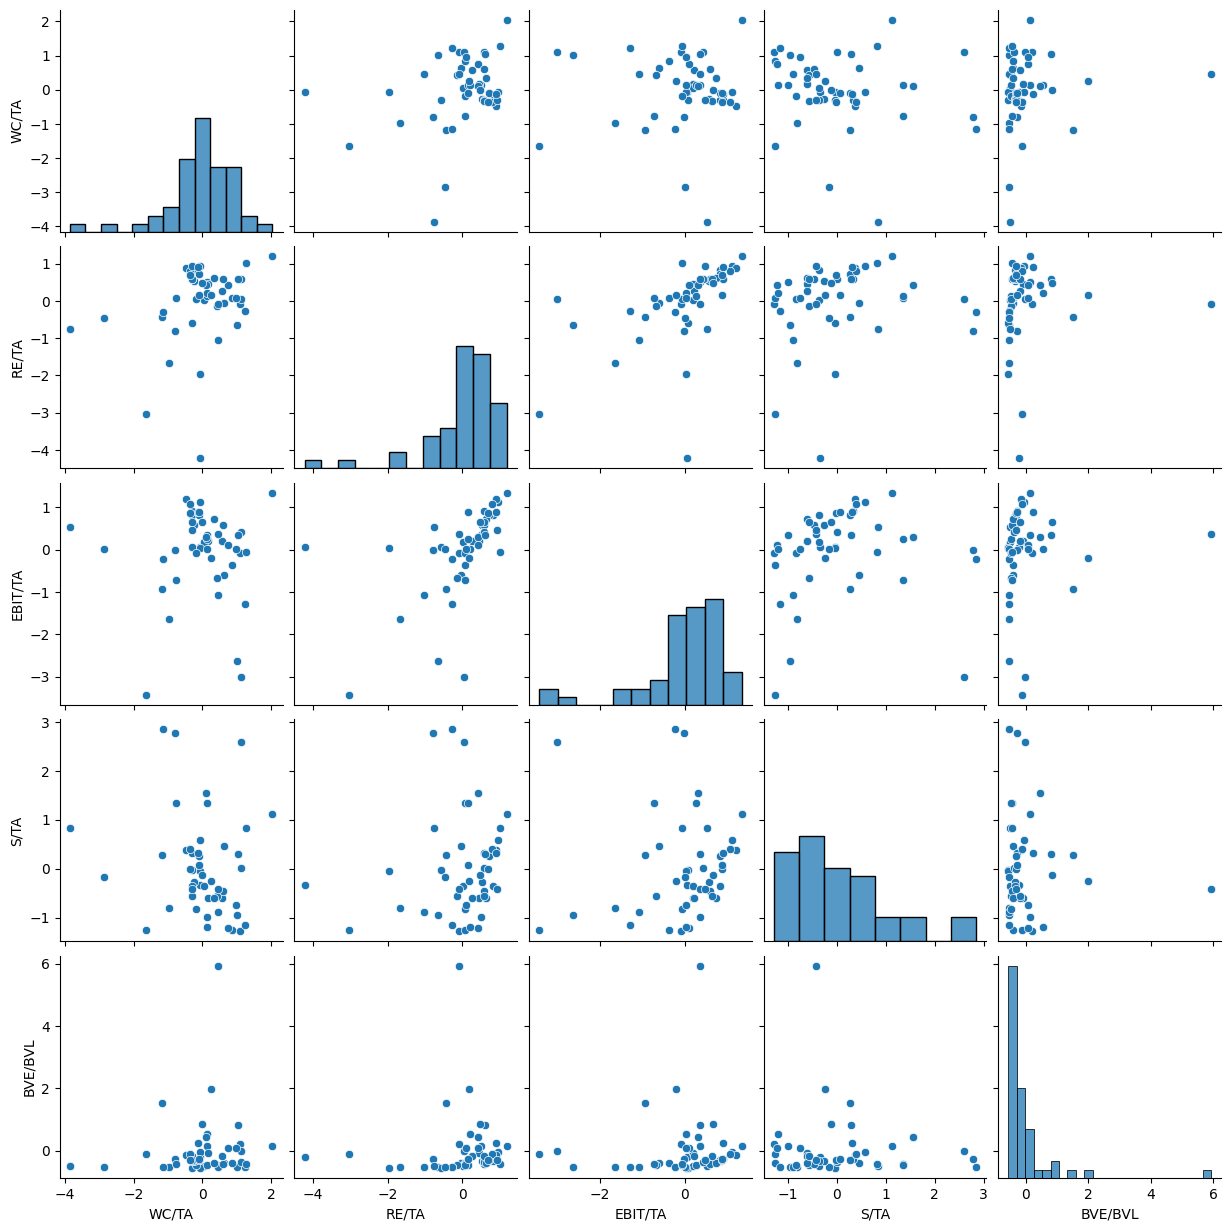

In [11]:
sns.pairplot(features_scaled)
plt.show()

In [6]:
from sklearn.mixture import GaussianMixture

In [7]:
em = GaussianMixture(n_components=2, n_init=30)
em.fit(features_scaled)

GaussianMixture(n_components=2, n_init=30)

In [8]:
clusters = em.predict(features_scaled)

In [9]:
features_scaled_clusters = pd.concat([features_scaled, pd.Series(clusters, name='cluster', index=features_scaled.index)], axis=1)
features_scaled_clusters.sample(5)

,WC/TA,RE/TA,EBIT/TA,S/TA,BVE/BVL,cluster
Company,,,,,,
WebLink Wireless,-3.861156,-0.758979,0.526916,0.839389,-0.508059,1
Winstar,-0.175611,0.060351,-0.078087,-0.819559,-0.469718,0
Qwest,-0.318597,0.587697,0.639649,-0.557108,-0.162439,0
Akamai Technologies,0.145379,0.212448,0.019616,-1.185694,0.545758,0
U.S. Wireless,-1.646327,-3.032673,-3.422511,-1.260217,-0.111011,1


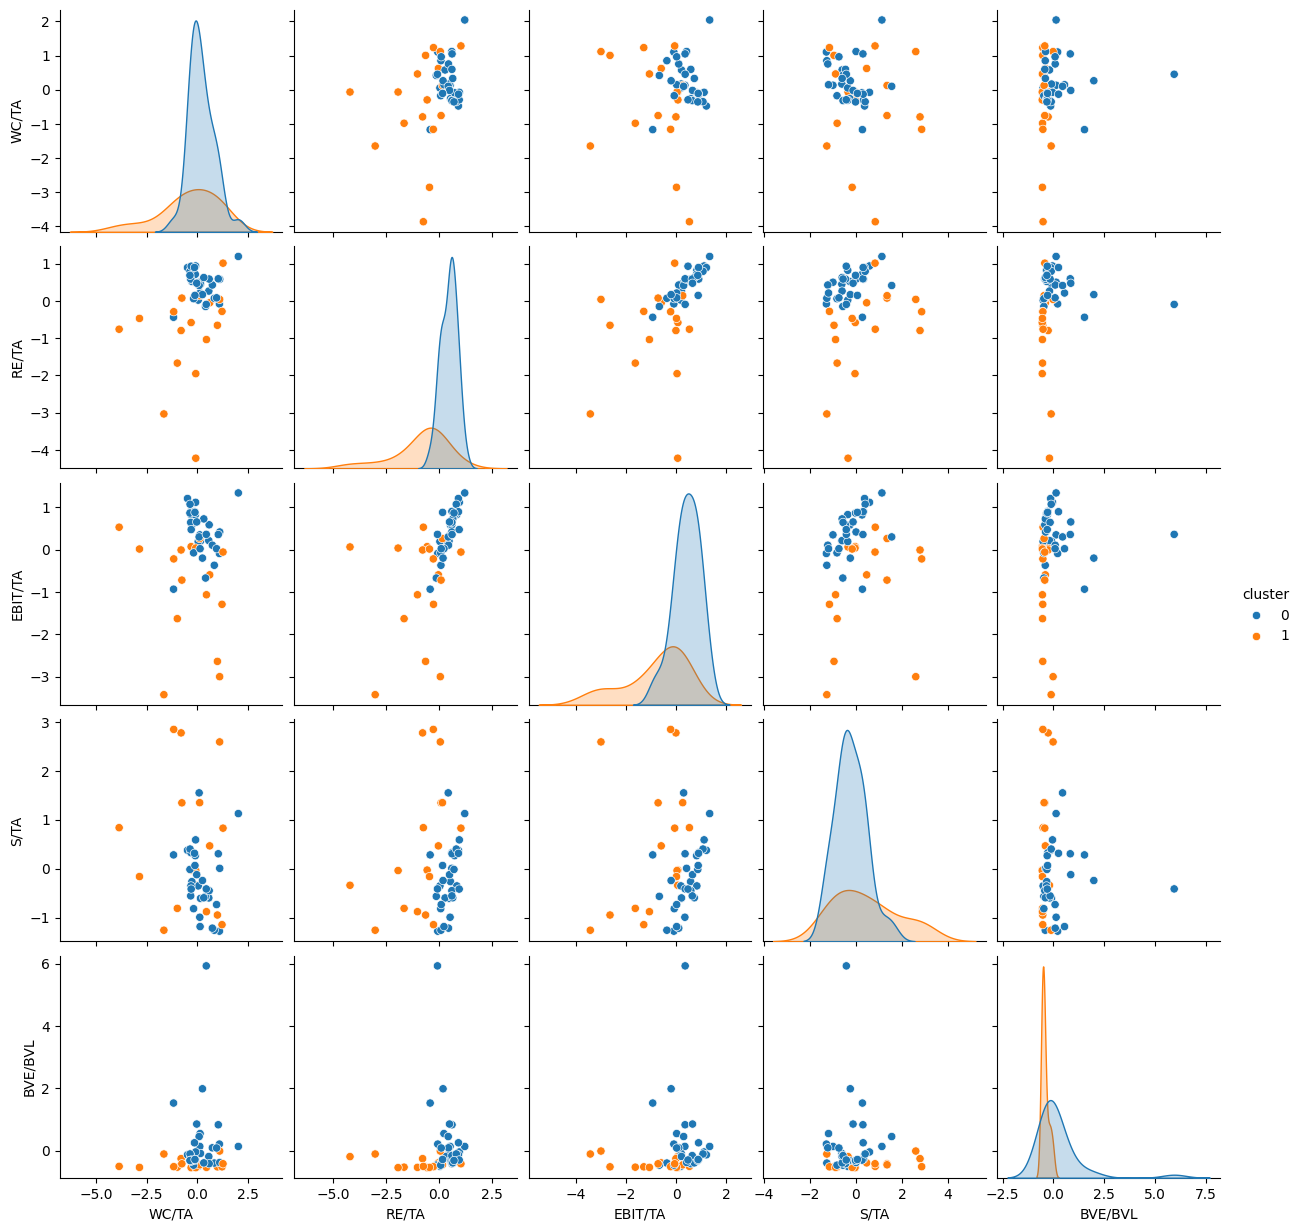

In [10]:
sns.pairplot(features_scaled_clusters, hue="cluster")
plt.show()